#Grupo de Trabajo: Jenifer Alejandra Aguilera y Paula Siauchó Unriza

In [108]:
%pylab inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import*
init_printing(use_unicode=True)
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#Defino la función que me recibe como parámetro 
#Defino los símbolos para poder resolver el polinomio
#De creación empírica uso el polinomio de Adam-Basforth (Con inspiración de un HandsON realizado en clase) 
#Defino las variables T1 y T2 con la herramienta var

init_printing(use_unicode=True)

def Lagrange(Num):
    fu=0
    #f=var('f')
    t=var('t')
    for i in range(Num):
        nn=1
        for j in range(Num):
            if i != j:
                t1 = var('t%d'%j)
                t2 = var('t%d'%i)
                nn *= ((t - t1)/(t2 - t1))
        fu+=nn*var('f%d'%i)
    return fu

In [3]:
#Función de orden cero (0)
Lagrange(0)

In [4]:

#Función de orden primero (1)
Lagrange(1)

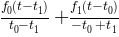

In [5]:
#Función de orden dos (2)
Lagrange(2)

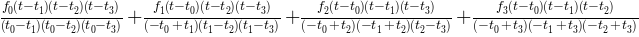

In [6]:
#Función de orden cuatro (4)
Lagrange(4)

#b)Adams

In [7]:
#Defino la función de adams
#Defino las variables con la ayuda de SYmbols y un arreglo de SYmbols para ir generando el for 
#Traigo mi función Lagrange como mi polinomio
#Con la ayuda de subs voy reescribiendo el polinomio

init_printing(use_unicode=True)


def Adams(Num):
    
    Polinomio=Lagrange(Num)
    t=symbols('t')
    arraySim=symarray('t', Num) 
    h=symbols('h') 
    
    for i in range(Num):
        
        Polinomio = Polinomio.subs(arraySim[i],arraySim[0]-i*h)
        integral=simplify(integrate(Polinomio,(t,arraySim[0],(arraySim[0]+h))))
        
    return integral

In [8]:
#Función de orden uno (1)
Adams(1)

#Punto 2
##Potencial Gravitacional

In [29]:
#Definimos todas las constantes necesarias
#Densidad las unidad son (Kg/cm3)
#La unidad del lado del cubo esta en (m)
#Todas las unidades de as constantes se encuentran en SI (Sistema Internacional)

M=30 #Masa en kg

Ro=400.

Lado=3000

e0=8.85e-12 

q=1e-2 

xmin=-Lado/2

xmax= Lado/2

ymin=-Lado/2

ymax= Lado/2

zmin=-Lado/2

zmax=Lado/2

NumIter=2000

G=6.674e-11

Nl=((xmax*2)/30) +1

print Nl


101


In [112]:
#Declaro las coordenadas en las tres dimesiones
#Creo los mesgrid de cada coordenada (x y z)
#La variable que se llama constante pertenece al potencial gravitacional
#Creo el cuadrado con la ayuda de np.ones y np.zeros
#Mi cubo es de 10x10x10 y esta fijado en el centro de la malla de 100x100x100

xx=np.linspace(xmin,xmax,Nl)
yy=np.linspace(ymin,ymax,Nl) 
zz=np.linspace(zmin,zmax, Nl)

x,y,z=np.meshgrid(xx,yy,zz)

dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl
dz=(zmax-zmin)/Nl

constante=Ro*np.pi*4*G

densidad=np.ones((Nl,Nl,Nl))

cuadrado = np.ones((10,10,10))
cuadradoEn400= cuadrado*400
cuafradoF=np.array(cuadradoEn400*4.*pi*G*M**2)

densidad[45:55,45:55,45:55] = cuadradoEn400


densidad=np.array(densidad*Ro)
print len(densidad)
print len(cuadrado)


101
10


In [ ]:
#Se implementa el método de relación, inspirado en el cuaderno de Juan David Lizarazo, se suma uno para evitar singularidades
X=(x*x)+1
Y=(y*y)+1
Z=(z*z)+1
r=np.sqrt(X+Y+Z)
#Se define el potencial
Pot=-G*Ro*M**3/r

for __ in range(NumIter):
    Pot=1/6.*(np.roll(Pot,1,axis=0)+
              np.roll(Pot,-1,axis=0)+
              np.roll(Pot,1,axis=1)+
              np.roll(Pot,-1,axis=1)+
              np.roll(Pot,1,axis= 2)+
              np.roll(Pot,-1,axis= 2)-
              4*np.pi*G*(dx**2)*densidad)
    Pot[0]=0.
    Pot[-1]=0.
    Pot[:,0]=0.
    Pot[:,-1]=0.
    Pot[:,:,0]=0.
    Pot[:,:,-1]=0.

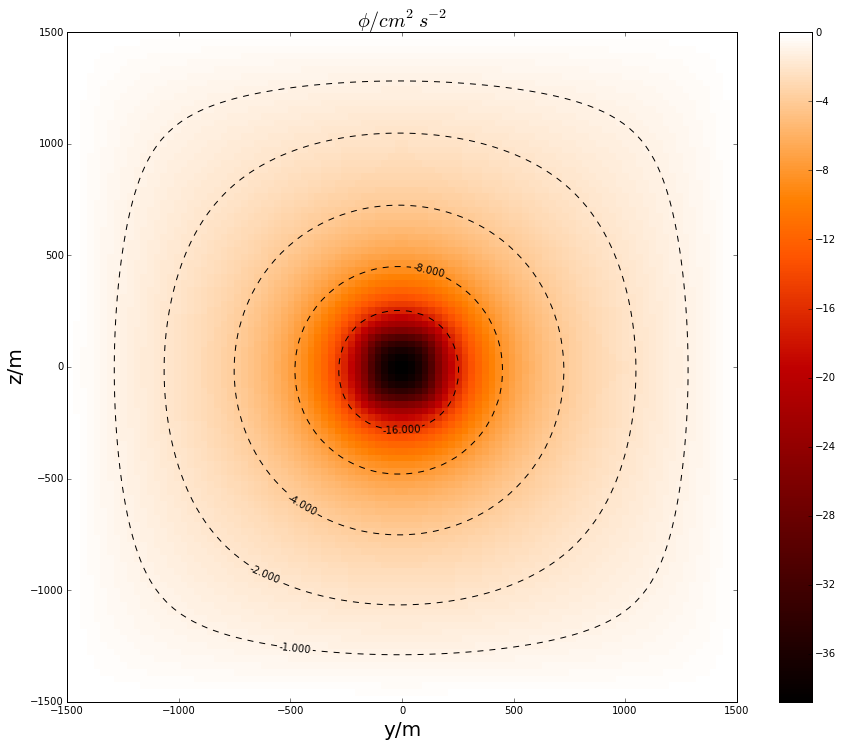

In [126]:
#Graficar 
xm, ym = meshgrid(xx, yy)

figure(figsize=(15,12)) #Se crea la figura.
A = pcolor(xm, ym,20*Pot[50],cmap='gist_heat') #Se usa gist_heat para tener una tonalidad apropiada para ver el problema
B = contour(xm, ym,20*Pot[50], [-16,-8,-4,-2,-1], colors = 'Black') 
#Nombre lineas de contorno
label = clabel(B, inline=1, fontsize=10)
colorbar(A)
title("$\phi/cm^2 s^{-2}$",fontsize=20)
xlabel("y/m",fontsize=20)
ylabel("z/m",fontsize=20)

#Potencial Eléctrico en el Eje Z & Masas puntuales


In [89]:
#Masitas puntuales (como Alejandra)
#Defino otro campo, como un arreglo de ceros

campo2=np.zeros((Nl, Nl, Nl))

Ale = np.linspace(-120., 120., 9.)

for i in range(len(Ale)):
    for j in range(len(Ale)):
        for k in range(len(Ale)):
            
            posicion=(np.sqrt((x-Ale[i])**2+ (y-Ale[j])**2 + (z-Ale[k])**2) + 3.)
            
            campo2 += (-G*((Lado**3)*Ro)/(9**3))/posicion

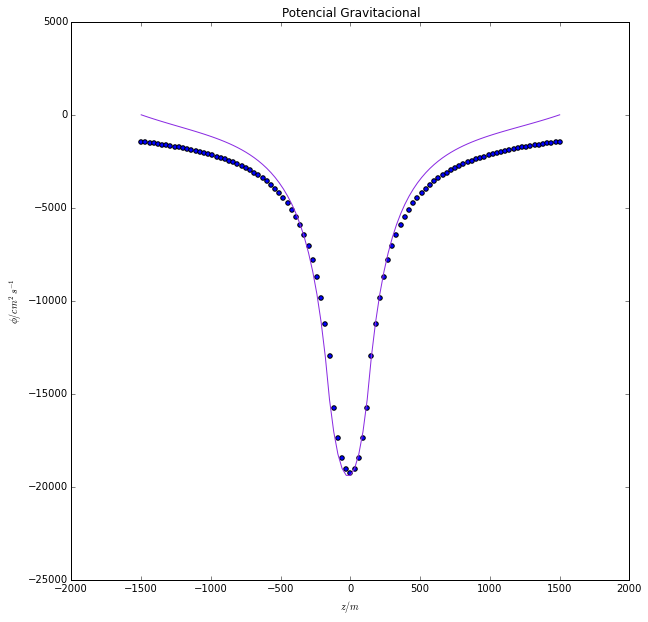

In [99]:
#Gráfica

coorn=linspace(xmin,xmax,Nl)
C=Ro*(270**3)*G/1500

plt.figure(figsize=(10,10))
plt.plot(coorn,(Pot[50,50,:])*10000,color='blueviolet')
plt.scatter(zz,(campo2[50,50,:]+C)*3000) 
plt.title('Potencial Gravitacional')
plt.xlabel('$z/m$')
plt.ylabel('$\phi/cm^2s^{-1}$')
plt.show()

#Derivada numérica

In [103]:
#Derivada para hallar el campo
campo3 = (np.roll(Pot[50,50,:],-1)-roll(Pot[50,50,:],1))/(2.*30) 
campo3 = campo3[1:-1]
print len(campo3)

99


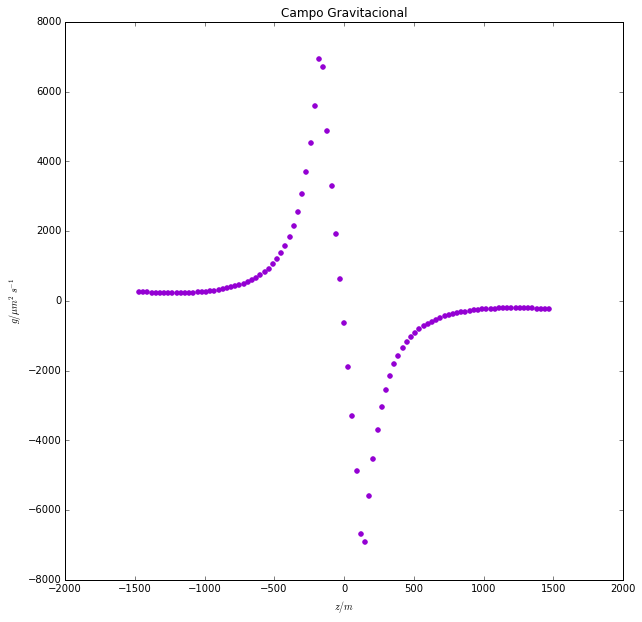

In [106]:
#Gráfica
coornn=linspace(xmin,xmax,Nl)
plt.figure(figsize=(10,10))
plt.scatter(coornn[1:-1],-campo3*1000000,color='DarkViolet')
plt.title('Campo Gravitacional')
plt.xlabel('$z/m$')
plt.ylabel('$g/\mu m^2s^{-1}$')
plt.show()

#Tiempo-iteral d

In [107]:
#Método de Runge-Kutta- Insipirado en un ejemplo de clase de Métodos Computacionales
def Kutta4():
    global t
    global Deltat
    global Y
    K1 = f(Y)
    K2 = f(Y + Deltat*(1./2.*K1))
    K3 = f(Y + Deltat*(1./2.*K2))
    K4 = f(Y + Deltat*K3)
    Y+= Deltat * (1./6.*K1 + 1./3.*K2 + 1./3.*K3 + 1./6.*K4)
    t+= Deltat

In [115]:
#Interpolación

interpol=interpolate.interp1d(coornn[1:-1],-campo3)

ajuste=np.polyfit(coornn[1:-1],-campo3,10)

interpol2=np.poly1d(ajuste)

In [118]:
print interpol2

           10             9             8             7             6
1.345e-33 x  - 9.641e-30 x - 7.644e-27 x + 5.046e-23 x + 1.558e-20 x
              5             4             3             2
 - 9.189e-17 x - 1.355e-14 x + 6.752e-11 x + 4.507e-09 x - 1.661e-05 x - 0.0002984


In [119]:
#Condiciones iniciales
#Masa de 500 en llegar al potencial, al potencial (0) y un tiempo de 135
sol=np.array([-500.,135.,0])